Title: Population Statisitics

Author: Philip Cullen

Task:

Part 1:

Write a jupyter notebook that analyses the differences between the sexes by age in Ireland:

- Weighted mean age (by sex)

- The difference between the sexes by age

Part 2:

In the same notebook, make a variable that stores an age (say 35)

- Write that code that would group the people within 5 years of that age together, into one age group 

- Calculate the population difference between the sexes in that age group.

Part 3:

- Write the code that would work out which region in Ireland has the biggest population difference between the sexes in that age group

In [12]:
# First I need to get the data that I'll be using, in this case is the file cso-populationbyage.csv

import pandas as pd
import matplotlib.pyplot as plt

url = "https://ws.cso.ie/public/api.restful/PxStat.Data.Cube_API.ReadDataset/FY006A/CSV/1.0/en"
df = pd.read_csv(url)
# Creates a panda dataframe of the data from the .csv file.

print(df.shape)
print(df.columns)
df.head()
# Checking the data to make sure I have the correct information

print("Unique Sex values BEFORE cleaning:", df["Sex"].unique())
print(df.head(20))

(9792, 12)
Index(['STATISTIC', 'Statistic Label', 'TLIST(A1)', 'CensusYear',
       'C02199V02655', 'Sex', 'C02076V03371', 'Single Year of Age',
       'C03789V04537', 'Administrative Counties', 'UNIT', 'VALUE'],
      dtype='object')
Unique Sex values BEFORE cleaning: ['Both sexes' 'Male' 'Female']
    STATISTIC Statistic Label  TLIST(A1)  CensusYear C02199V02655         Sex  \
0   FY006AC01      Population       2022        2022            -  Both sexes   
1   FY006AC01      Population       2022        2022            -  Both sexes   
2   FY006AC01      Population       2022        2022            -  Both sexes   
3   FY006AC01      Population       2022        2022            -  Both sexes   
4   FY006AC01      Population       2022        2022            -  Both sexes   
5   FY006AC01      Population       2022        2022            -  Both sexes   
6   FY006AC01      Population       2022        2022            -  Both sexes   
7   FY006AC01      Population       2022        202

Now that the data has been obtained I need to clean/prepare it for analysis

This ensures I only have the data for what I need.

In [13]:
# First I'm going to drop any columns I don't require.
# In this case I don't need the Statistic Label, Census Year or UNIT columns
# df.drop(columns=drop_col_list, inplace=True) → removes those columns from the DataFrame
# errors=ignore, prevents Python crashing if it encounters any columns that don't exist
drop_col_list = ["Statistic Label", "CensusYear", "UNIT"]
df.drop(columns=drop_col_list, inplace=True, errors='ignore')


df = df[df["Single Year of Age"] != "All ages"]
# This removes any row where Single Year of Age column says All ages

df["Single Year of Age"] = df["Single Year of Age"].str.replace('Under 1 year', '0')
# Changes the text “Under 1 year” to “0”, so babies under 1 year old are represented as age 0
df["Single Year of Age"] = df["Single Year of Age"].str.replace(r'\D', '', regex=True)
# This removes any non-numeric characters from the age column
# \D means anything that isn’t a number

df["Single Year of Age"] = df["Single Year of Age"].astype('int64')
# Converts the cleaned text values into real integers
# Essentially any strings are text convert to integers

df.rename(columns={
    "Single Year of Age": "Age",
    "VALUE": "Population",
    "Administrative Counties": "Region"
}, inplace=True)
# Renames long or awkward column titles into shorter, clearer names:
# Single Year of Age: Age
# VALUE: Population
# Administrative Counties: Region
# inplace=True applies the change directly to datafrrame

df["Sex"] = df["Sex"].str.strip().str.capitalize()
# .str.strip() removes any extra spaces before or after the text
# .str.capitalize() ensures consistent formatting

print("Cleaned Data Sample for Analysis")
print(df.head(10))
print("\nColumns:", df.columns.tolist())
print("\nUnique Sex values:", df["Sex"].unique())
print("\nAge range:", df["Age"].min(), "-", df["Age"].max())
# This just displays the cleaned data to ensure all cleaning was done and data is easier to manipulate and read

Cleaned Data Sample for Analysis
    STATISTIC  TLIST(A1) C02199V02655         Sex C02076V03371  Age  \
32  FY006AC01       2022            -  Both sexes          200    0   
33  FY006AC01       2022            -  Both sexes          200    0   
34  FY006AC01       2022            -  Both sexes          200    0   
35  FY006AC01       2022            -  Both sexes          200    0   
36  FY006AC01       2022            -  Both sexes          200    0   
37  FY006AC01       2022            -  Both sexes          200    0   
38  FY006AC01       2022            -  Both sexes          200    0   
39  FY006AC01       2022            -  Both sexes          200    0   
40  FY006AC01       2022            -  Both sexes          200    0   
41  FY006AC01       2022            -  Both sexes          200    0   

                            C03789V04537  \
32                                   IE0   
33  2ae19629-1492-13a3-e055-000000000001   
34  2ae19629-1433-13a3-e055-000000000001   
35  2ae19

Part 1:

- Weighted mean age (by sex)

- The difference between the sexes by age

Weighted Mean Age by Sex:
Sex
Both sexes    38.346620
Female        38.939796
Male          37.739448
dtype: float64

 Population Difference Sample:
Sex  Both sexes  Female   Male  Difference
Age                                       
0        115592   56372  59220        2848
1        112840   55090  57750        2660
2        118420   57948  60472        2524
3        120968   58966  62002        3036
4        123010   59638  63372        3734
5        128052   62684  65368        2684
6        133428   65244  68184        2940
7        138002   67144  70858        3714
8        141466   68874  72592        3718
9        144392   70454  73938        3484


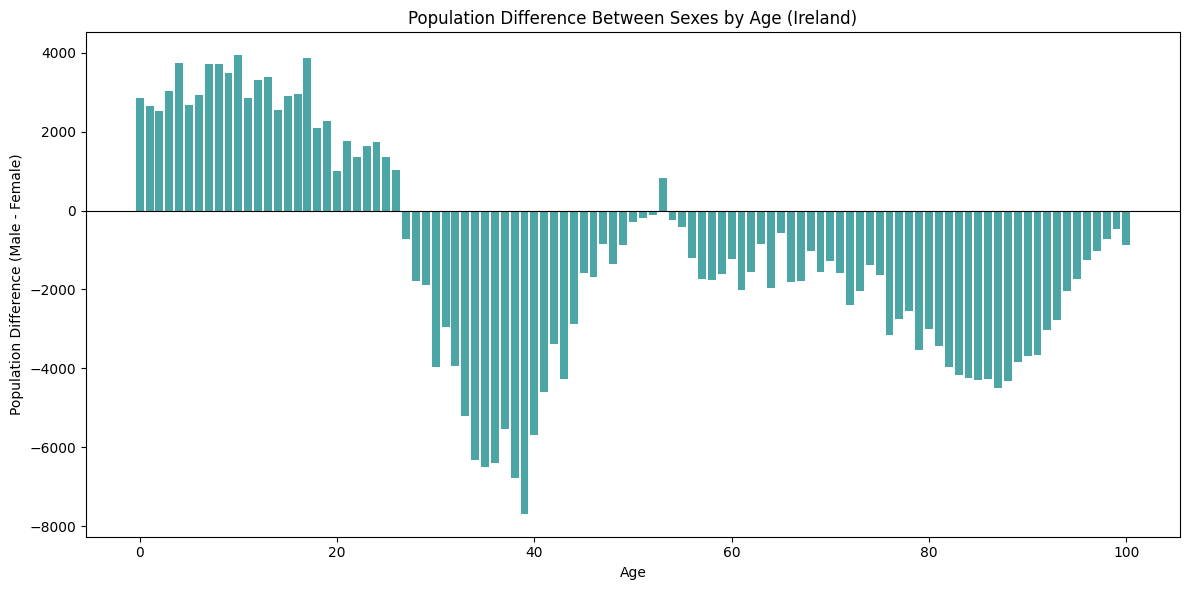

['Both sexes' 'Male' 'Female']


In [14]:
# Groups the cleaned data by Sex and Age to sum populations
grouped = df.groupby(["Sex", "Age"])["Population"].sum().reset_index()

# Calculates weighted mean age for each sex
weighted_mean_age = (
    (grouped["Age"] * grouped["Population"])
    .groupby(grouped["Sex"])
    .sum()
    / grouped.groupby("Sex")["Population"].sum()
)

# Displays the weighted mean age by sex
print("Weighted Mean Age by Sex:")
print(weighted_mean_age)

# Creates a pivot table for easy comparison (rows = ages, columns = sex)
pivot = grouped.pivot(index="Age", columns="Sex", values="Population")

# Make sure both Male & Female columns exist (avoid KeyErrors)
for sex in ["Male", "Female"]:
    if sex not in pivot.columns:
        pivot[sex] = 0

#Computes and plots the difference between male and female populations
pivot["Difference"] = pivot["Male"] - pivot["Female"]

print("\n Population Difference Sample:")
print(pivot.head(10))

# Displays the pivot table
plt.figure(figsize=(12, 6))
plt.bar(pivot.index, pivot["Difference"], color="teal", alpha=0.7)
plt.axhline(0, color="black", linewidth=0.8)
plt.title("Population Difference Between Sexes by Age (Ireland)")
plt.xlabel("Age")
plt.ylabel("Population Difference (Male - Female)")
plt.tight_layout()
plt.show()

print(df["Sex"].unique())
